##Don't close this browser tab while your project is running.

**Run the code block below to start your Clouderizer project. **

In [0]:
!wget -NS --content-disposition "https://console.clouderizer.com/givemecolabinit"
import colab
colab.init()
!wget -NS --content-disposition "https://console.clouderizer.com/givemeinitsh/8zSF9r4k" && bash ./clouderizer_init.sh

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs=64

In [0]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_68.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_85.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_210.jpg')]

In [0]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

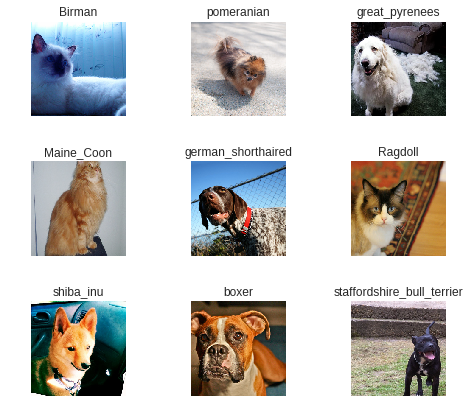

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['yorkshire_terrier', 'Ragdoll', 'wheaten_terrier', 'keeshond', 'Sphynx', 'german_shorthaired', 'newfoundland', 'Birman', 'pomeranian', 'Egyptian_Mau', 'beagle', 'scottish_terrier', 'Bombay', 'american_pit_bull_terrier', 'shiba_inu', 'British_Shorthair', 'Abyssinian', 'Bengal', 'havanese', 'pug', 'leonberger', 'english_setter', 'miniature_pinscher', 'japanese_chin', 'boxer', 'samoyed', 'staffordshire_bull_terrier', 'saint_bernard', 'great_pyrenees', 'american_bulldog', 'Siamese', 'basset_hound', 'chihuahua', 'Maine_Coon', 'Persian', 'Russian_Blue', 'english_cocker_spaniel']


(37, 37)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:07<00:00, 11984442.65it/s]


In [0]:
learn.fit_one_cycle(4)

Total time: 06:46
epoch  train_loss  valid_loss  error_rate
1      0.221294    0.228884    0.077808    (01:42)
2      0.265564    0.226914    0.074425    (01:42)
3      0.224012    0.181277    0.064953    (01:41)
4      0.173988    0.176448    0.060893    (01:40)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

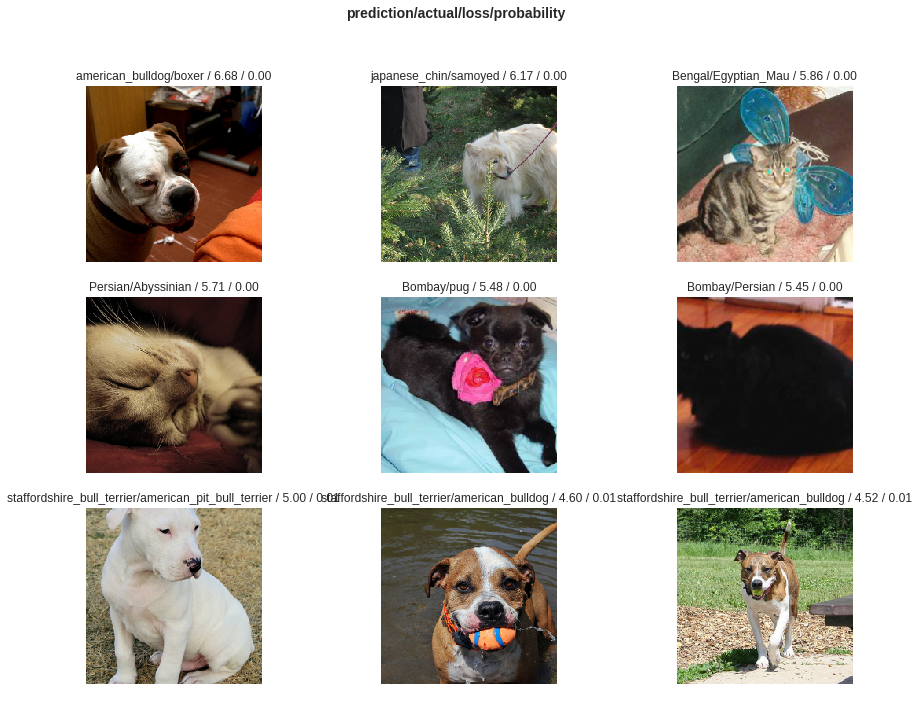

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
help(interp.plot_top_losses)

Help on method plot_top_losses in module fastai.vision.learner:

plot_top_losses(k, largest=True, figsize=(12, 12)) method of fastai.vision.learner.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of predicted class.



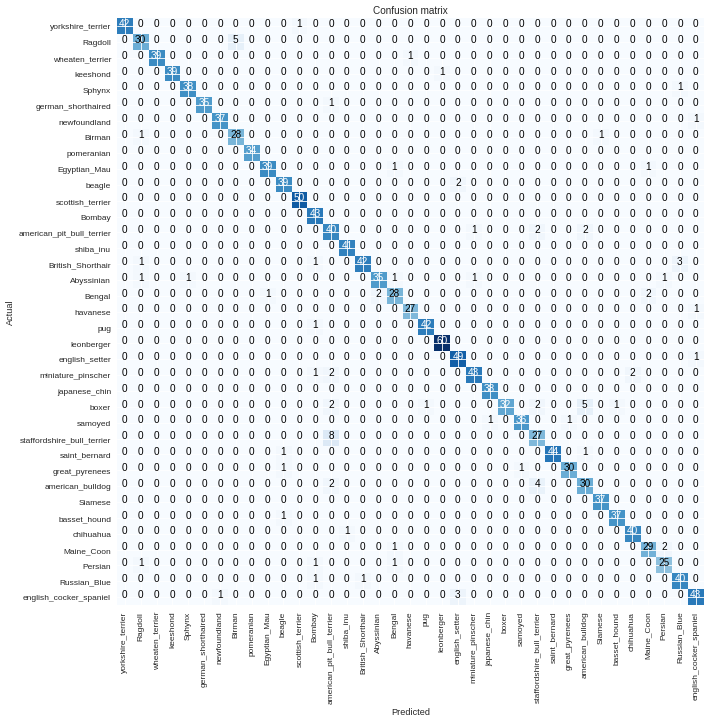

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Birman', 'Ragdoll', 4),
 ('beagle', 'basset_hound', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Birman', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

Total time: 01:52
epoch  train_loss  valid_loss  error_rate
1      1.056666    0.536610    0.169824    (01:52)



In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


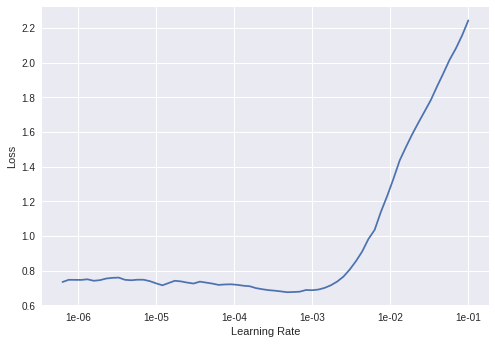

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 03:44
epoch  train_loss  valid_loss  error_rate
1      0.630362    0.458666    0.145467    (01:52)
2      0.583031    0.438364    0.133965    (01:52)

